# Titanic Tutorial by YouhanLee - 2nd Try

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. 데이터셋 확인

In [70]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [71]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1. Null 데이터 확인

In [74]:
for col in df_train.columns:
    msg = 'column: {:>12}\t Percent of NaN value : {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value : 0.00%
column:     Survived	 Percent of NaN value : 0.00%
column:       Pclass	 Percent of NaN value : 0.00%
column:         Name	 Percent of NaN value : 0.00%
column:          Sex	 Percent of NaN value : 0.00%
column:          Age	 Percent of NaN value : 19.87%
column:        SibSp	 Percent of NaN value : 0.00%
column:        Parch	 Percent of NaN value : 0.00%
column:       Ticket	 Percent of NaN value : 0.00%
column:         Fare	 Percent of NaN value : 0.00%
column:        Cabin	 Percent of NaN value : 77.10%
column:     Embarked	 Percent of NaN value : 0.22%


In [75]:
for col in df_test.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 20.57%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 0.00%
column:         Fare	 Percent of NaN value: 0.24%
column:        Cabin	 Percent of NaN value: 78.23%
column:     Embarked	 Percent of NaN value: 0.00%


train 데이터에는 `Age`, `Cabin`, `Embarked`에, test 데이터에는 `Age`, `Fare`, `Cabin`에 null 데이터가 있음을 알 수 있다. 이것을 **missingno** 라이브러리를 이용해 시각화하면 다음과 같다.

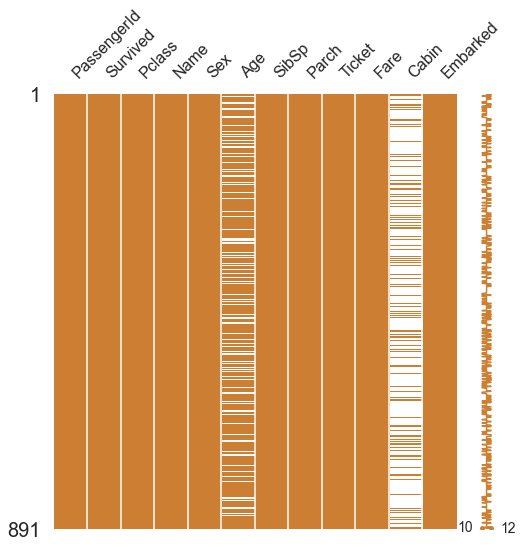

In [76]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

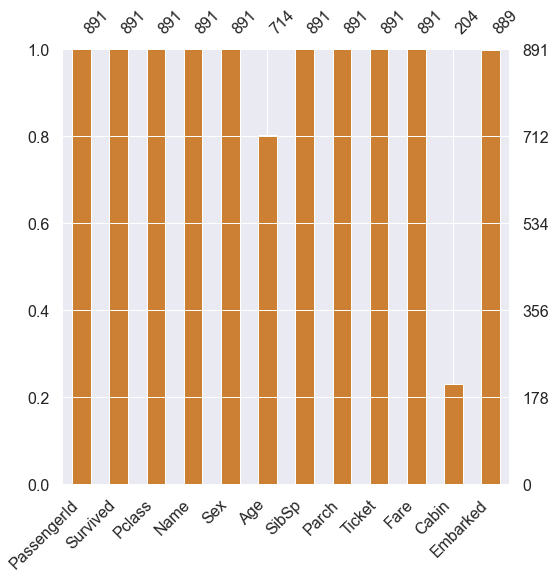

In [77]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2. Target Label 확인
생존자/사망자의 비율이 꽤 **균일(balanced)한 것**을 볼 수 있다.

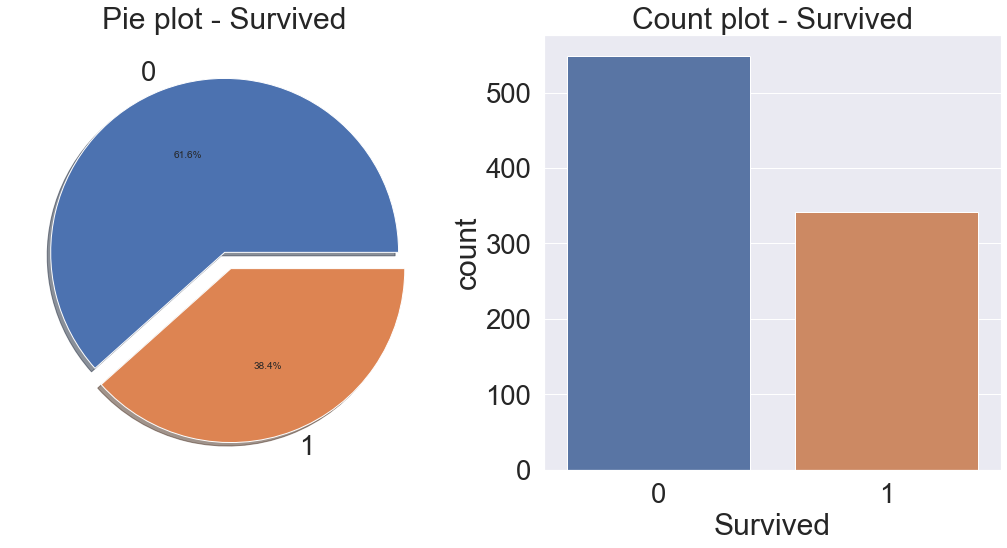

In [78]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2. Exploratory Data Analysis (EDA)

### 2.1. Pclass - Categorical, Ordinal

In [79]:
# Pclass별 승선객 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [80]:
# Pclass별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


> `✨ OPINION`    
>`count()`와 `sum()`을 둘 다 쓸 필요 없이, **crosstab**을 사용하면 한 번에 파악이 가능하다.

In [81]:
# Pclass의 생존자/사망자 수
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


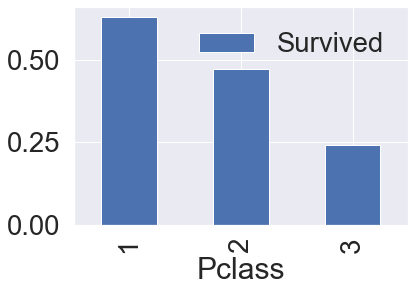

In [82]:
# 1. Pclass별 평균 생존률을 계산
# 2. 평균 생존률을 기준으로 역 정렬
# 3. barplot으로 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar()

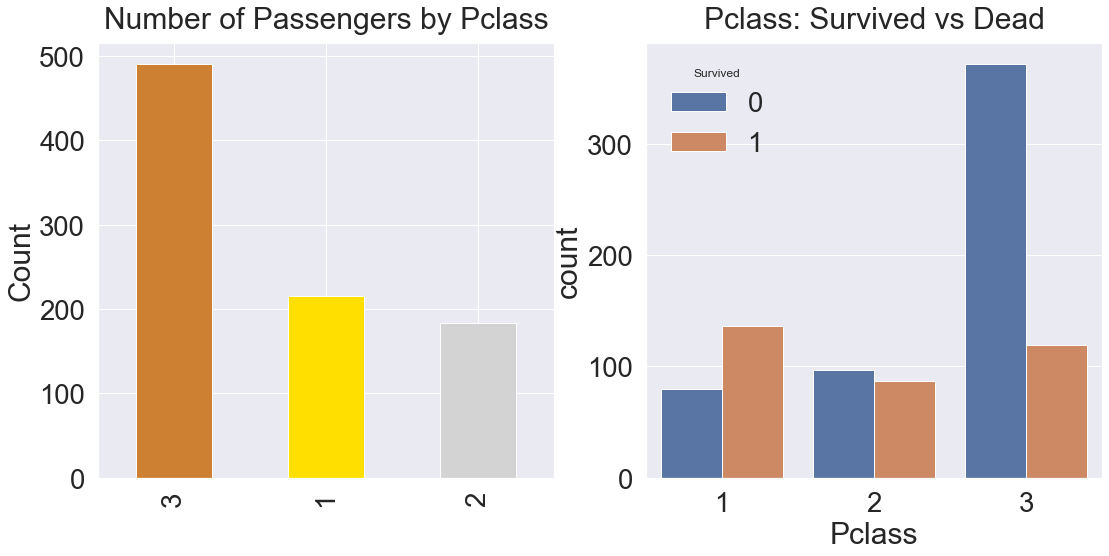

In [83]:
y_position = 1.02    # title 위치 설정 (기본=1)

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pclass별 승선객 수
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

# Pclass별 생존자/사망자 수
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

### 2.2. Sex - Categorical

In [84]:
# 각 성별의 생존자/사망자 수
pd.crosstab(df_train['Sex'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [85]:
# 각 성별의 평균 생존률
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


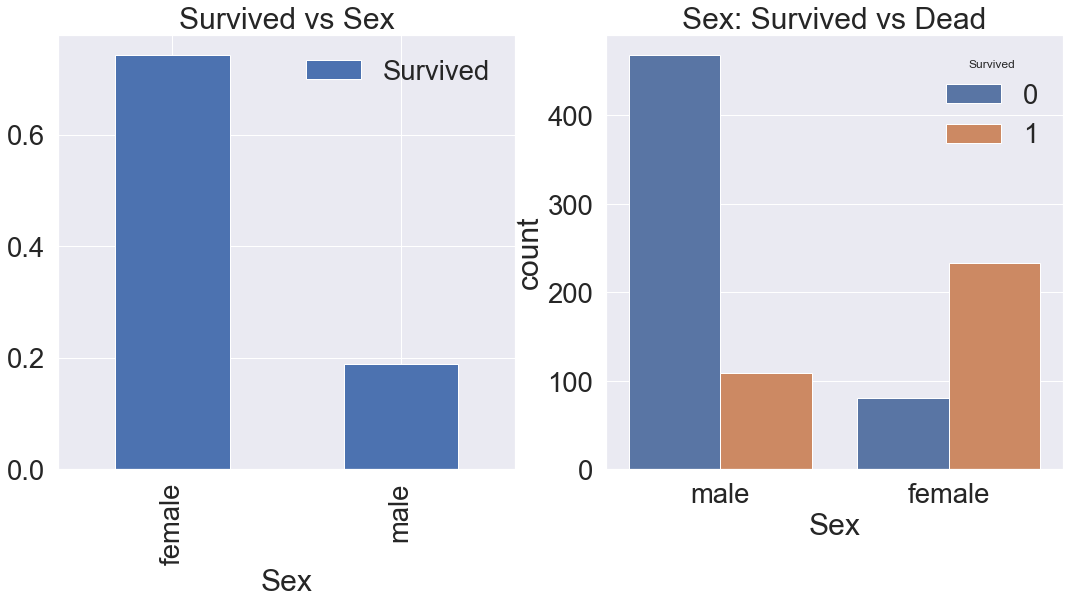

In [86]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 각 성별 평균 생존률
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 각 성별 생존자/사망자 수 
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

> `✨ OPINION`    
> 시각화 할 때 각각의 시각화가 어떤 이점이 있는지.
> * **crosstab** : 각 피처의 경우의 수마다의 수를 파악할 수 있다. (조건부 확률)
> * **groupby.mean** : 평균치를 구할 수 있어서 좋다.
> * **groupby.mean + barplot** : 평균치를 plot으로 나타내서 한 눈에 보기 좋다.
> * **countplot** : crosstab과 비슷하지만 plot으로 나타내서 한 눈에 보기 좋다.

### 2.3. Both Sex and Pclass

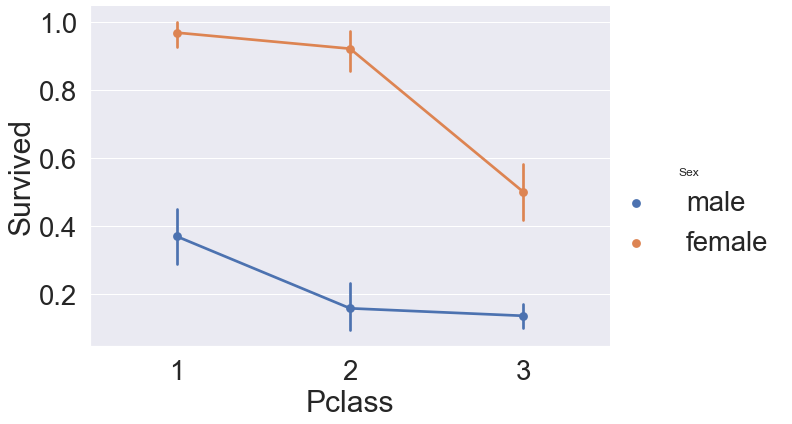

In [87]:
sns.factorplot('Pclass', 'Survived', hue='Sex',
               data=df_train, size=6, aspect=1.5)

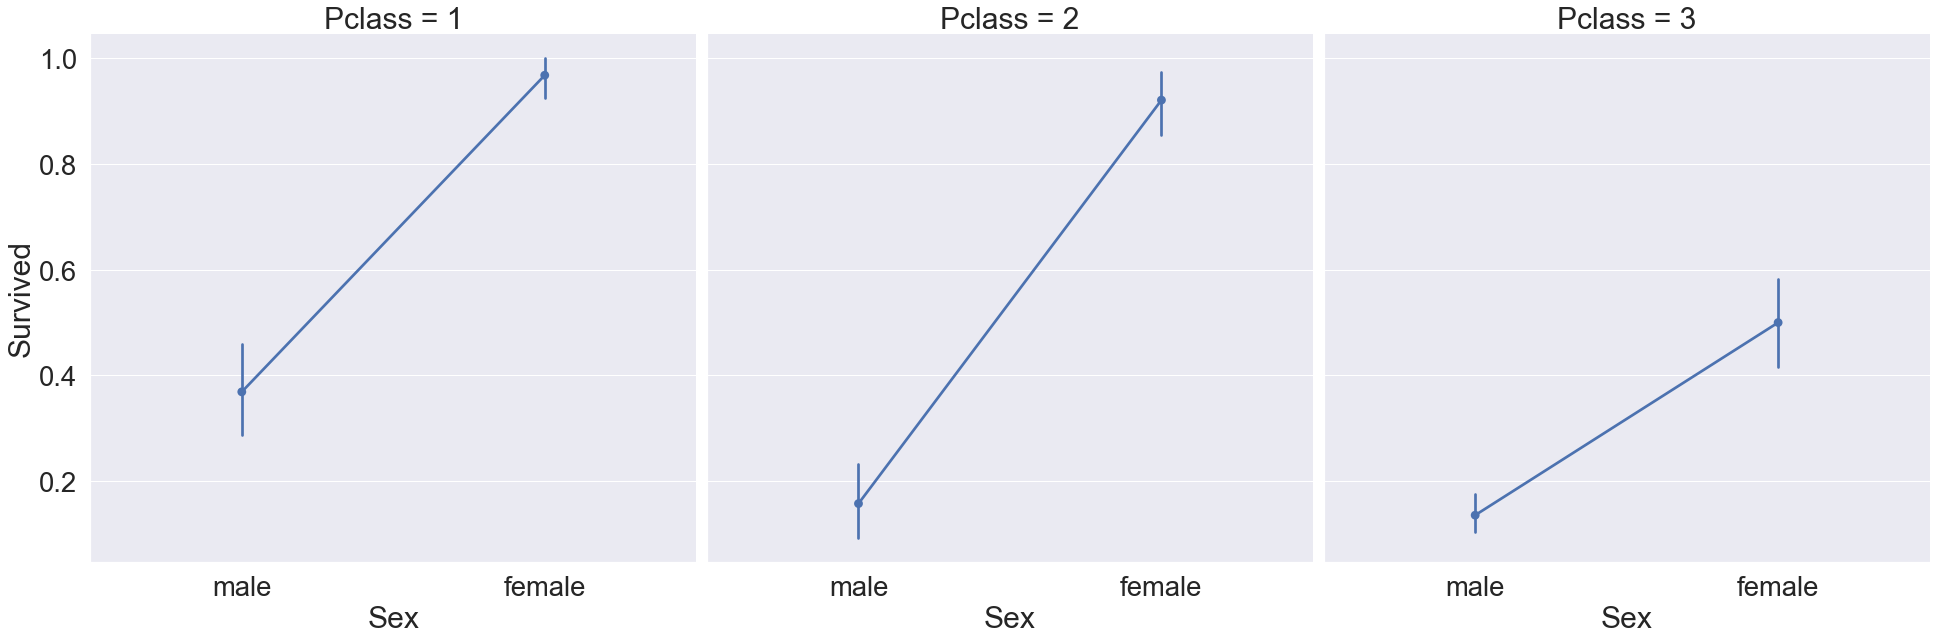

In [88]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, saturation=0.5, size=9, aspect=1)

> `✨ OPINION`   
> **factorplot**은 3개 이상의 피처를 한 눈에 비교해야할 때 좋다. 단, 이 피처들 모두 categorical해야 한다.

### 2.4. Age - Continuous

In [89]:
print('제일 나이가 많은 탑승객 : {:.1f} 살'.format(df_train['Age'].max()))
print('제일 나이가 어린 탑승객 : {:.1f} 살'.format(df_train['Age'].min()))
print('탑승객의 평균 나이 : {:.1f} 살'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80.0 살
제일 나이가 어린 탑승객 : 0.4 살
탑승객의 평균 나이 : 29.7 살


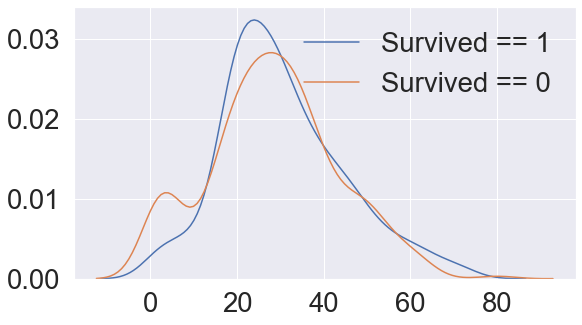

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# 생존자/사망자의 나이 분포
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

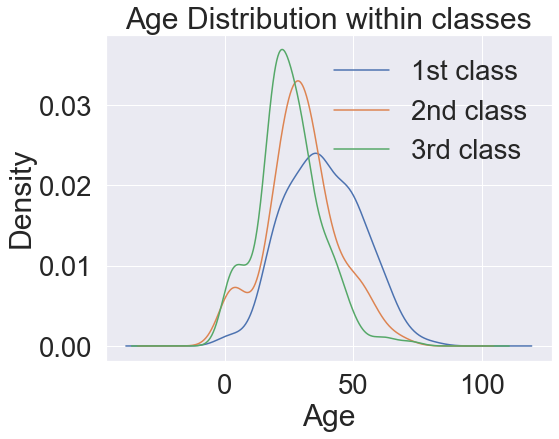

In [91]:
plt.figure(figsize=(8, 6))

# 클래스별 나이 분포
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

> `✨ OPINION`   
> **kdeplot**은 continous한 피처일 때, 그 피처의 확률밀도함수를 보고 싶을 때 쓰면 좋다. 확률밀도함수(probability density function, PDF)는 단위 x당 넓이 즉, 확률을 말하는데 복잡한 정의는 집어치우고 x가 N일 때의 확률이 y라고 보면 된다. 

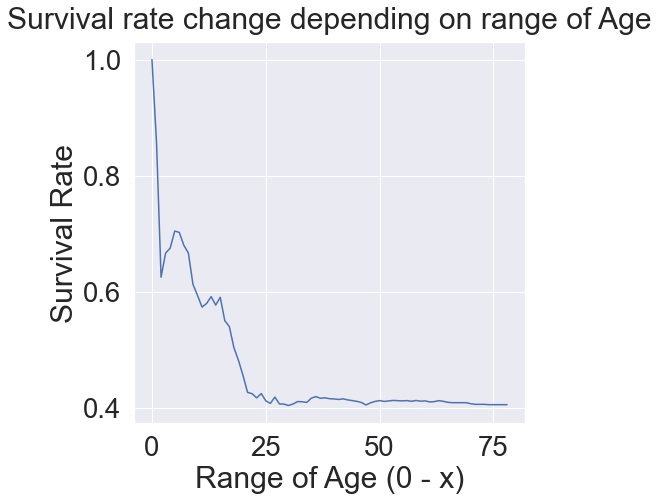

In [92]:
cummulate_survival_ratio = []

# 0살 - i살까지의 생존률 기록
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum(
    ) / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)

plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age (0 - x)')

plt.show()

### 2.5. Pclass, Sex, Age

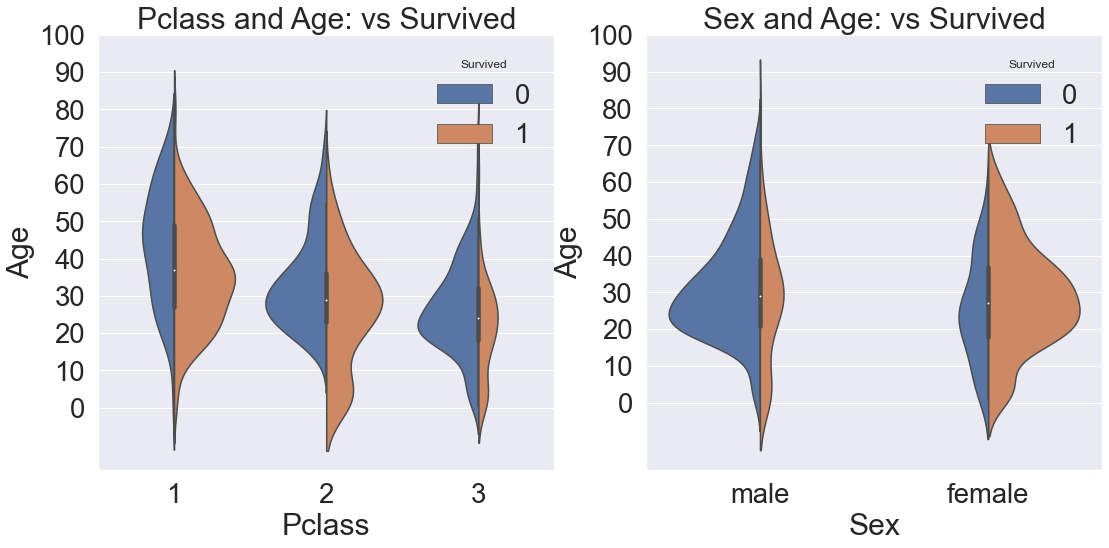

In [93]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pclass와 Age에서의 생존률 분포
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train,
               scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age: vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Sex와 Age에서의 생존률 분포
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train,
               scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age: vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

> `✨ OPINION`    
> **violinplot**은 boxplot과 비슷하지만 추가로 continous한 피처의 분포(distribution)까지 보여준다. `Age`처럼 각 피처 별 분포를 나타내고 싶을 때 좋을 듯한다.

### 2.6. Embarked - Categorical

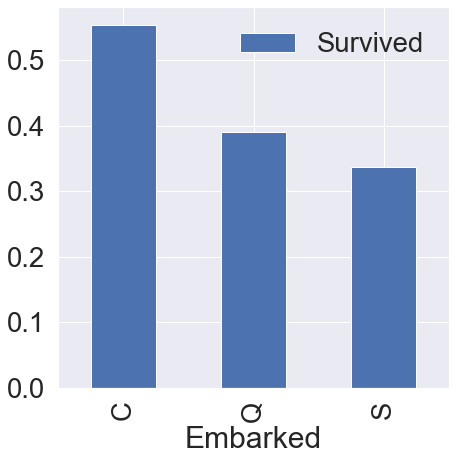

In [94]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Embarked별 평균 생존률
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

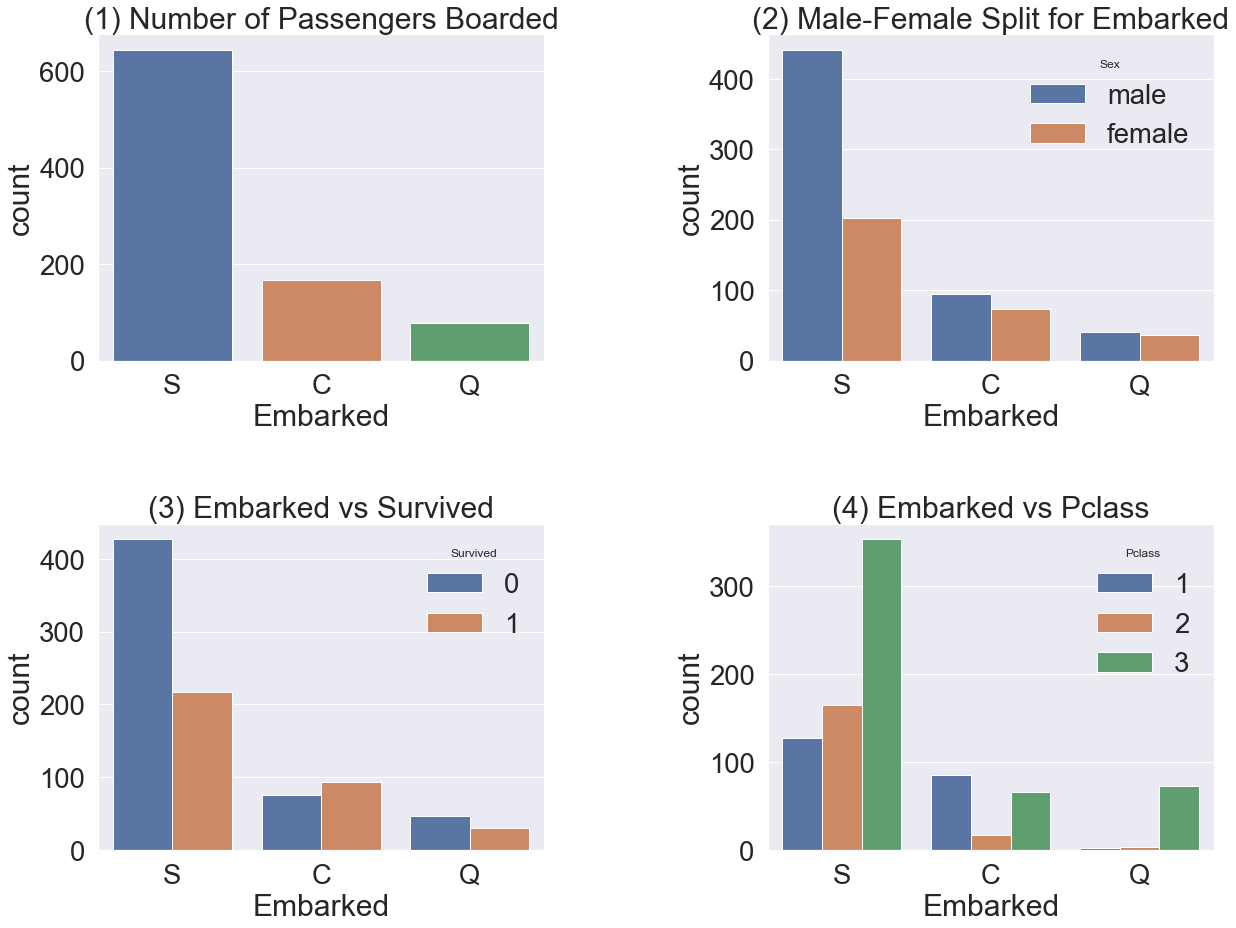

In [95]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 탑승한 곳에 따른 사람 수
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) Number of Passengers Boarded')

# 탑승한 곳에 따른 성별 분포
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

# 탑승한 곳에 따른 생존률 분포
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

# 탑승한 곳에 따른 클래스 분포
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

> `✨ OPINION`    
> subplot을 그렸는데 너무 다닥다닥 붙어있으면 `subplots_adjust`의 `hspace`와 `wspace` 값을 조정하여 figure끼리 떨어뜨려놓는다. 참고로 1이면 엄청 넓다!

### 2.7. FamilySize : SibSp, Parch - Discrete

In [96]:
# SibSp와 Parch로 새로운 피처 FamilySize 생성
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [97]:
print('Maximum size of Family :', df_train['FamilySize'].max())
print('Minimum size of Family :', df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family : 1


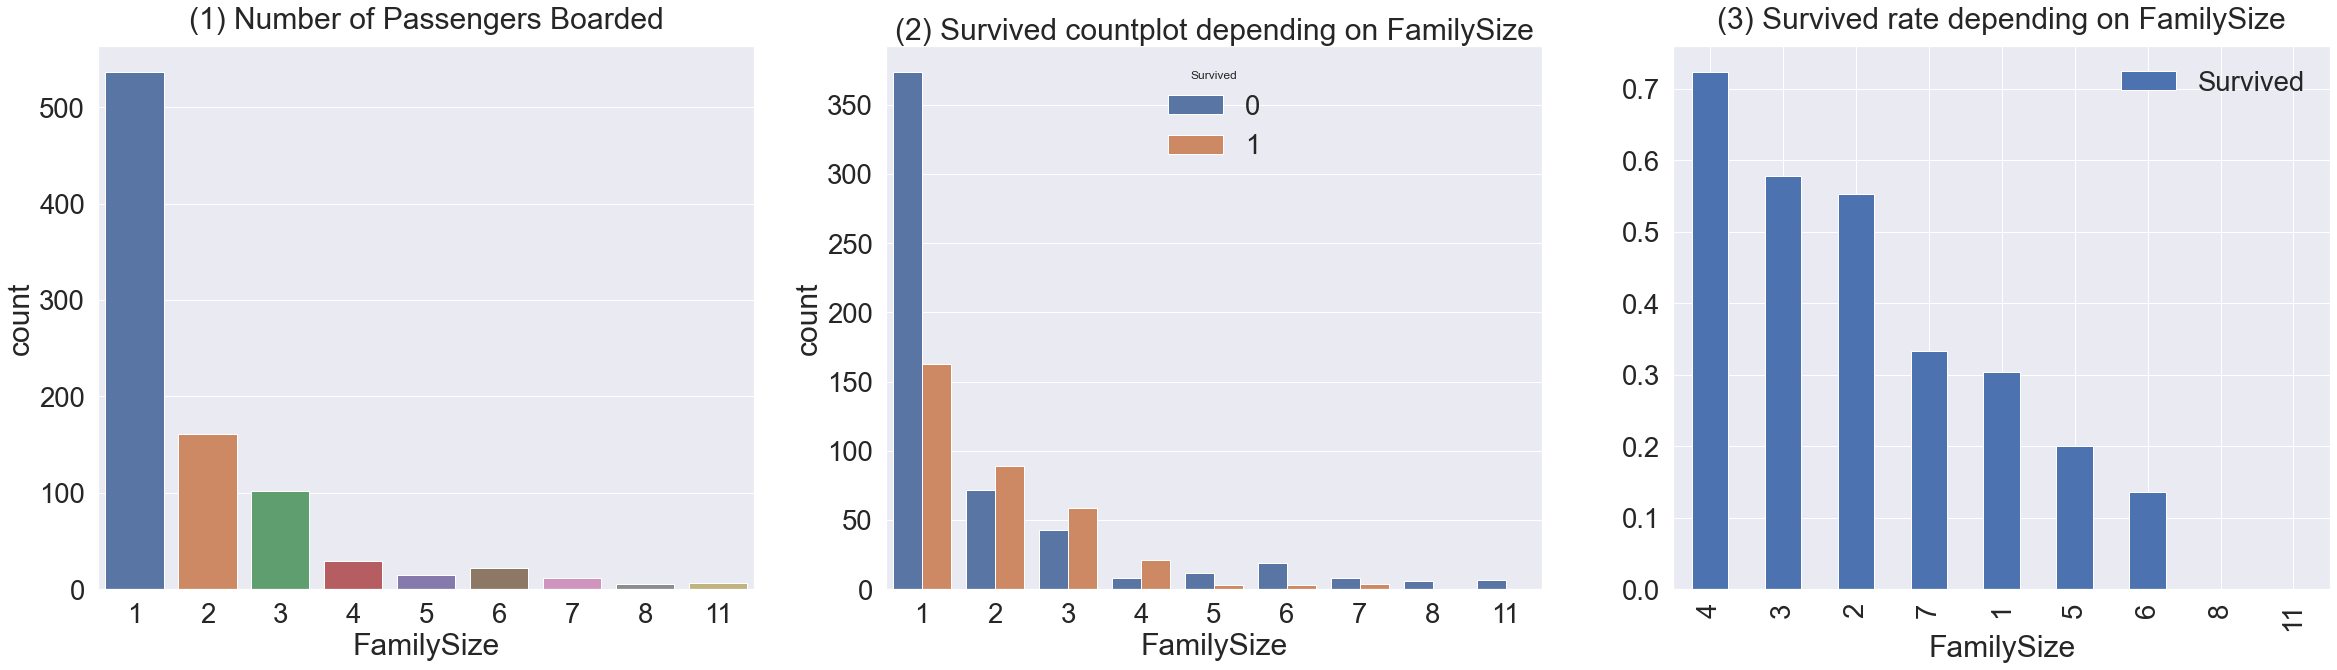

In [98]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# 가족 수에 따른 분포
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) Number of Passengers Boarded', y=1.02)

# 가족 수에 다른 생존자 분포
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

# 가족 수에 따른 생존률
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8. Fare - Continuous

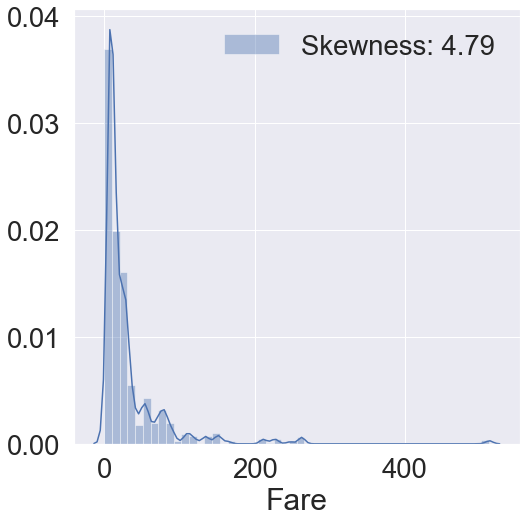

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Fare의 분포
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(
    df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

> `✨ OPINION`    
> **distplot**은 continuous한 피처의 분포를 보기 좋다. 특히 비대칭성 파악에 좋은 것 같다. 만약 비대칭적이라면 `log`를 취해서 정규분포를 이루도록 바꿔준다. 그대로 넣으면 모델이 너무 민감하게 대응하기 때문에.

In [100]:
# test 데이터의 Fare의 null 값을 평균으로 채움
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [101]:
# 비대칭성 해소
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

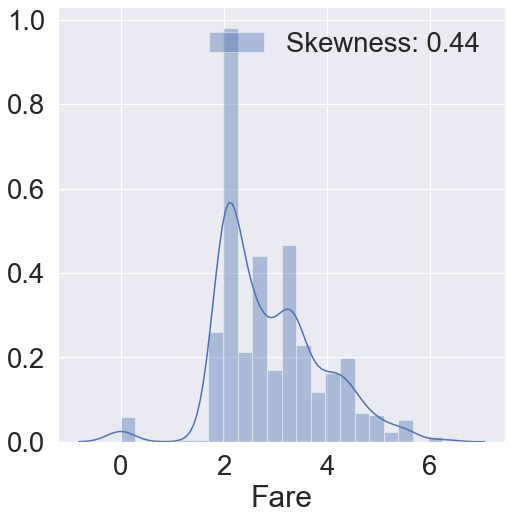

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### 2.9. Cabin

In [103]:
# null값이 80%라 제외
df_train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

### 2.10. Ticket - String

In [104]:
df_train['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
           ..
PC 17474    1
8475        1
236853      1
A/5 2817    1
113792      1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature Engineering

### 3.1. Fill Null

#### 3.1.1. Fill Null in Age using Title

In [105]:
# Title 추출
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [106]:
# Initial과 Sex별 사람 수
pd.crosstab(df_train['Initial'], df_train['Sex']
            ).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [107]:
# 잘못된 Initial 고치기
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
                            'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

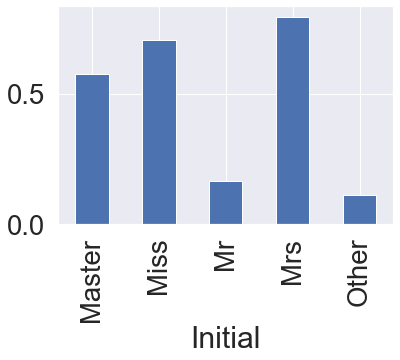

In [108]:
# Initial과 생존률의 관계
df_train.groupby(by='Initial')['Survived'].mean().plot.bar()

In [109]:
# Initial에 따른 평균 값들
# 나중에 Initial 별 평균 Age로 채울 예정
df_train.groupby(by='Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [110]:
# train 데이터의 Age null값 채우기
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Other'), 'Age'] = 46

In [111]:
# test 데이터의 Age null값 채우기
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

#### 3.1.2. Fill Null in Embarked

In [112]:
print('Number of Embarked Null Values : ', sum(df_train['Embarked'].isnull()))

Number of Embarked Null Values :  2


In [113]:
# 가장 많은 S항구로 null 값을 채움
df_train['Embarked'].fillna('S', inplace=True)

In [114]:
# null값이 있는지 검사
df_train['Embarked'].isnull().any()

False

### 3.2. Change Age: continous to categorical
* **방법1** : `loc`를 사용하여 boolean indexing으로 해당 데이터를 추출하여 변환
* **방법2** : `apply`와 따로 정의된 함수를 이용하여 변환
    * 개인적으로 이 방법이 가장 깔끔하다고 생각

In [115]:
# 방법 2
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

# 카테고리화 시킨 Age_cat 피처 생성
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

# 더이상 필요없는 Age 피처 삭제
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [116]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [117]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,7
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2


### 3.3. Change Initial, Embarked, Sex : string to numerical

In [118]:
# Initial 
df_train['Initial'] = df_train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [119]:
# Embarked
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [120]:
# Sex
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

### 3.5. 모든 Feature간의 상관관계
상관관계가 높은 피처들은 없으므로 이 데이터에는 불필요한 피처가 없다.

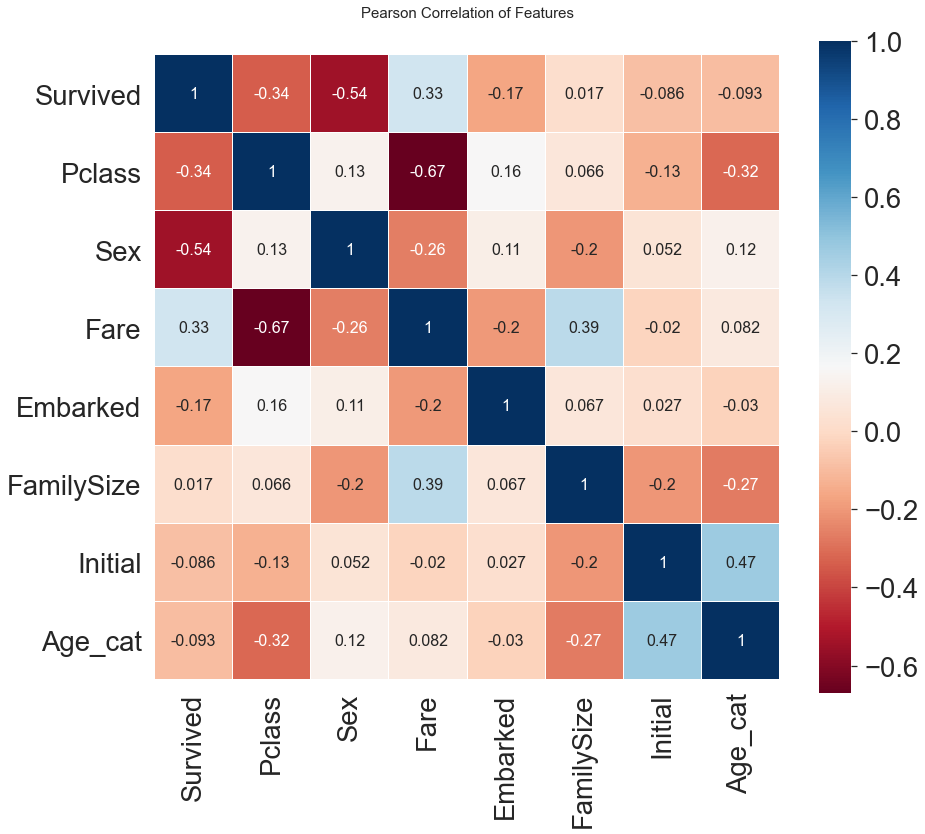

In [124]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex',
                         'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu

plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

### 3.4. One-hot encoding on Initial and Embarked
더 성능을 높이기 위해 **카테고리 개수만큼의 새로운 column을 생성하여 해당하는 값에만 1을 넣는** one-hot encoding을 해준다. 이 방식은 categorical한 피처에만 가능하다.

In [125]:
# Initial Encoding
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [126]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [127]:
# Embarked Encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [128]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


### 3.5. Drop Columns
가장 즐거운 단계! 이제 쓰레기 피처는 버리자.

In [129]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
               'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
              'Ticket', 'Cabin'], axis=1, inplace=True)

In [130]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [131]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,7,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


## 4. Building Model and Prediction using the Trained Model

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1. Preparation : Split dataset into train, valid, test set

In [133]:
# target label을 데이터셋에서 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [134]:
# train과 valid 데이터셋으로 분리
X_tr, X_vld, y_tr, y_vld = train_test_split(
    X_train, target_label, test_size=0.3, random_state=2020)

### 4.2. Model Generation and Prediction

In [135]:
# random forest 모델 생성
model = RandomForestClassifier()
model.fit(X_tr, y_tr)    # 학습
pred = model.predict(X_vld)    # 예측

In [136]:
print('Accuracy : {}%'.format(100 * metrics.accuracy_score(pred, y_vld)))

Accuracy : 80.97014925373134%


### 4.3. Feature Importance

In [138]:
from pandas import Series

# feature importance 추출
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

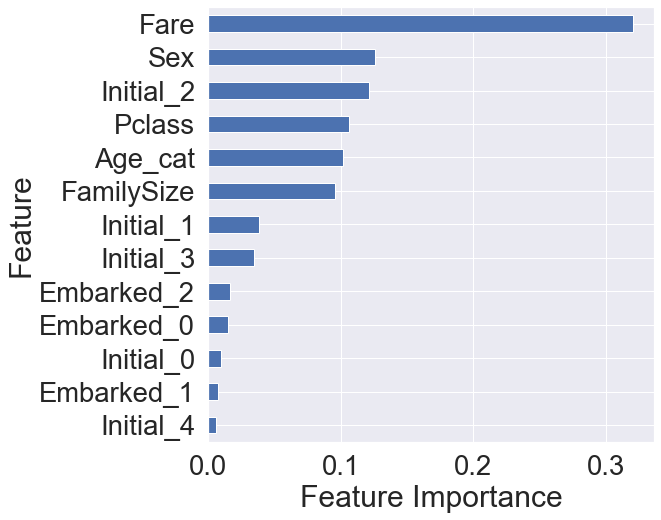

In [139]:
plt.figure(figsize=(8,8))

Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.show()

### 4.4. Prediction on Test Set

In [140]:
# submission 파일 로드
submission = pd.read_csv('../data/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [141]:
# 예측 후 submission 파일에 저장
pred = model.predict(X_test)
submission['Survived'] = pred
submission.to_csv('../data/youhanlee_submission_2.csv', index=False)